**Importing the dependancies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import pickle

**Data Collection and processing**

In [2]:
# load the dataset toa pandas dataframe
data = pd.read_csv("/content/Rainfall.csv")


In [3]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [4]:
data.shape

(366, 12)

In [5]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [6]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [7]:
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [9]:
# remove extra spaces in all columns
data.columns = data.columns.str.strip()

In [8]:
print("Data Info :")
data.info()

Data Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [10]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [12]:
# remove extra spaces in all columns
data.columns = data.columns.str.strip()

In [13]:
data = data.drop(columns=["day"])

In [14]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [15]:
# checking the number of missing values
data .isnulll().sum()

AttributeError: 'DataFrame' object has no attribute 'isnulll'

In [16]:
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,1


In [17]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [18]:
data["winddiraction"].unique()

KeyError: 'winddiraction'

In [19]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [20]:
# handle missing values
data["winddirection"]=data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"]=data["windspeed"].fillna(data["windspeed"].median())

In [21]:
print(data.isnull().sum())

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [22]:
data["rainfalll"].unique()

KeyError: 'rainfalll'

In [23]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [24]:
# converting the yes & no to 1 and 0 respectively
data["rainfall"] = data["rainfall"].map({"yes":1,"no":0})

In [25]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


**Exploratory Data Analysis (EDA)**

In [26]:
data.shape

(366, 11)

In [28]:
# setting plot stye for all the plots
sns.set(style="whitegrid")

In [29]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [30]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

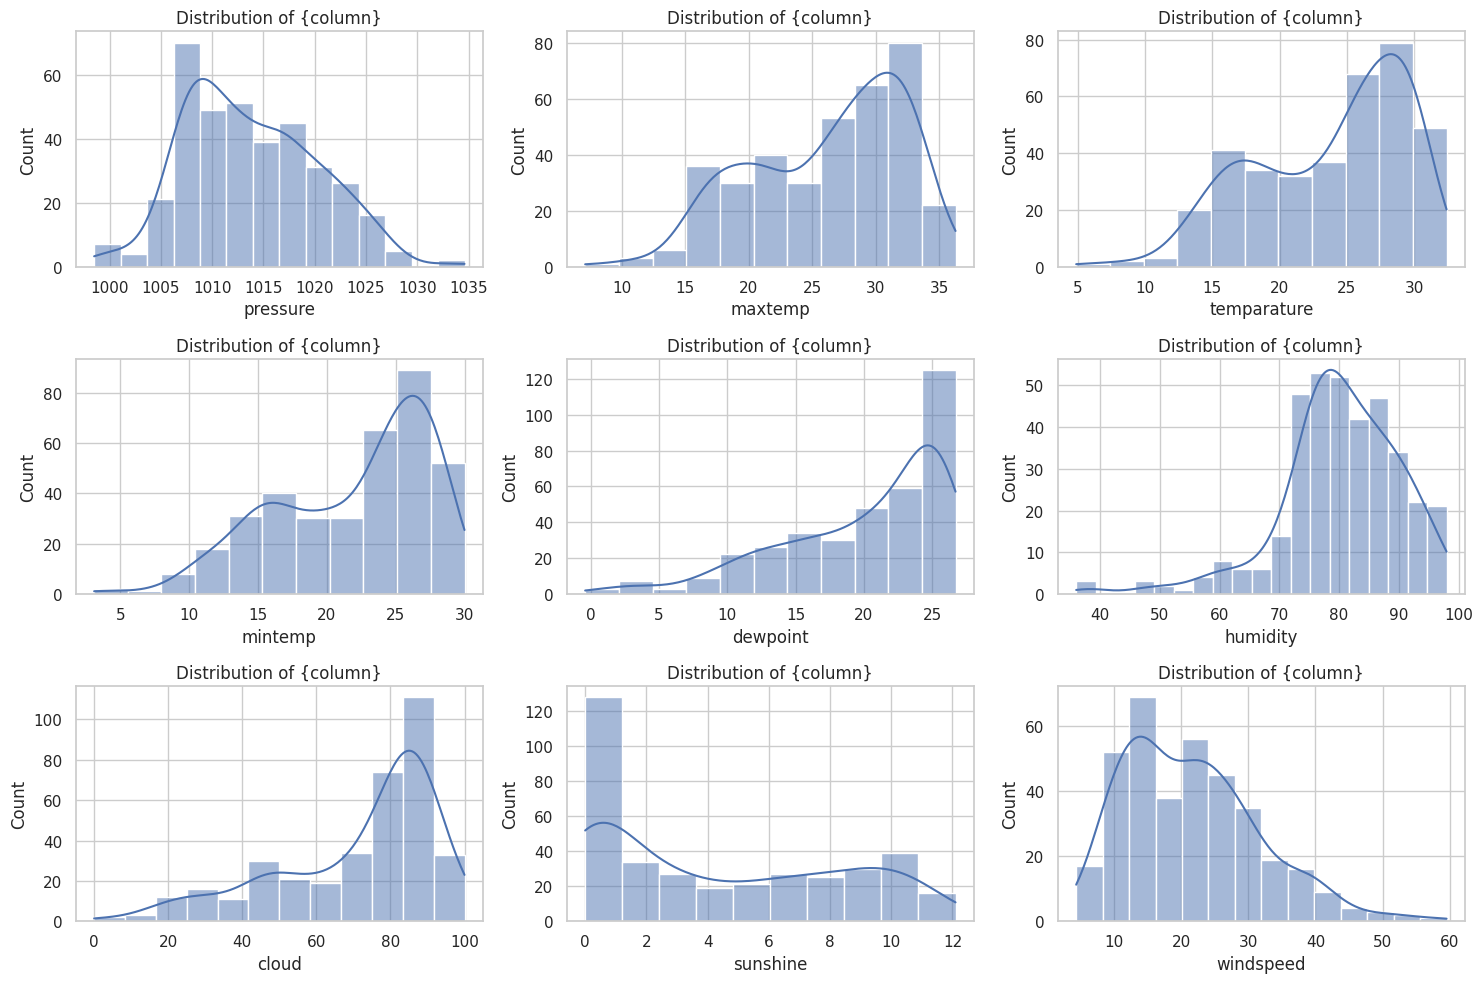

In [34]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3, 3, i)
  sns.histplot(data[column],kde=True)
  plt.title("Distribution of {column}")

plt.tight_layout()
plt.show()

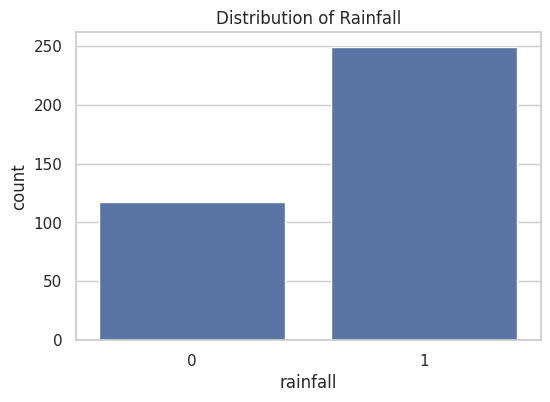

In [35]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall",data=data)
plt.title("Distribution of Rainfall")
plt.show()


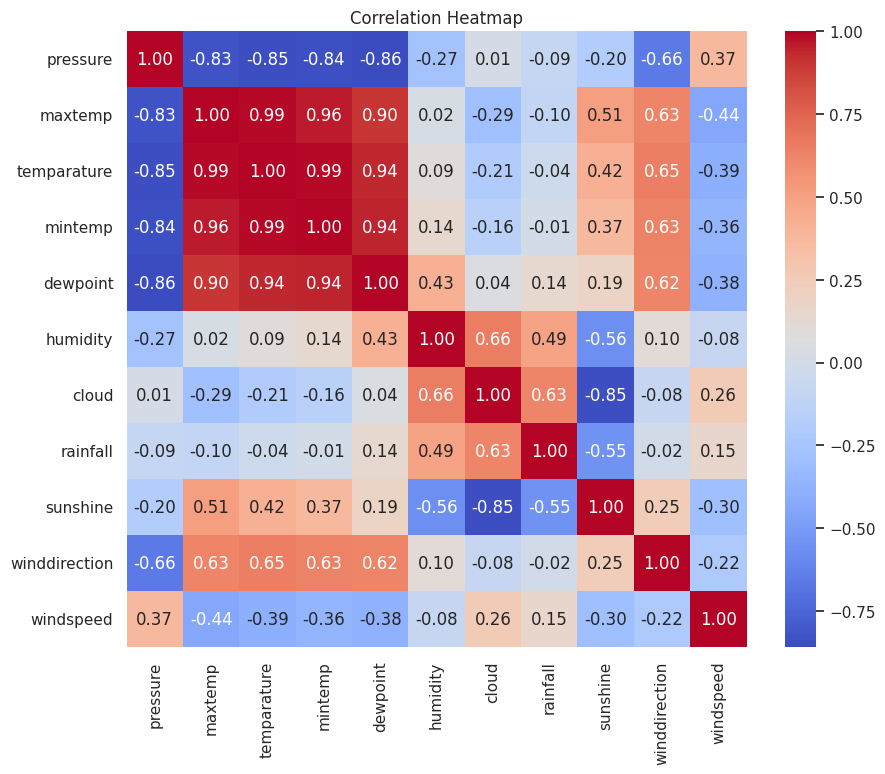

In [36]:
# correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

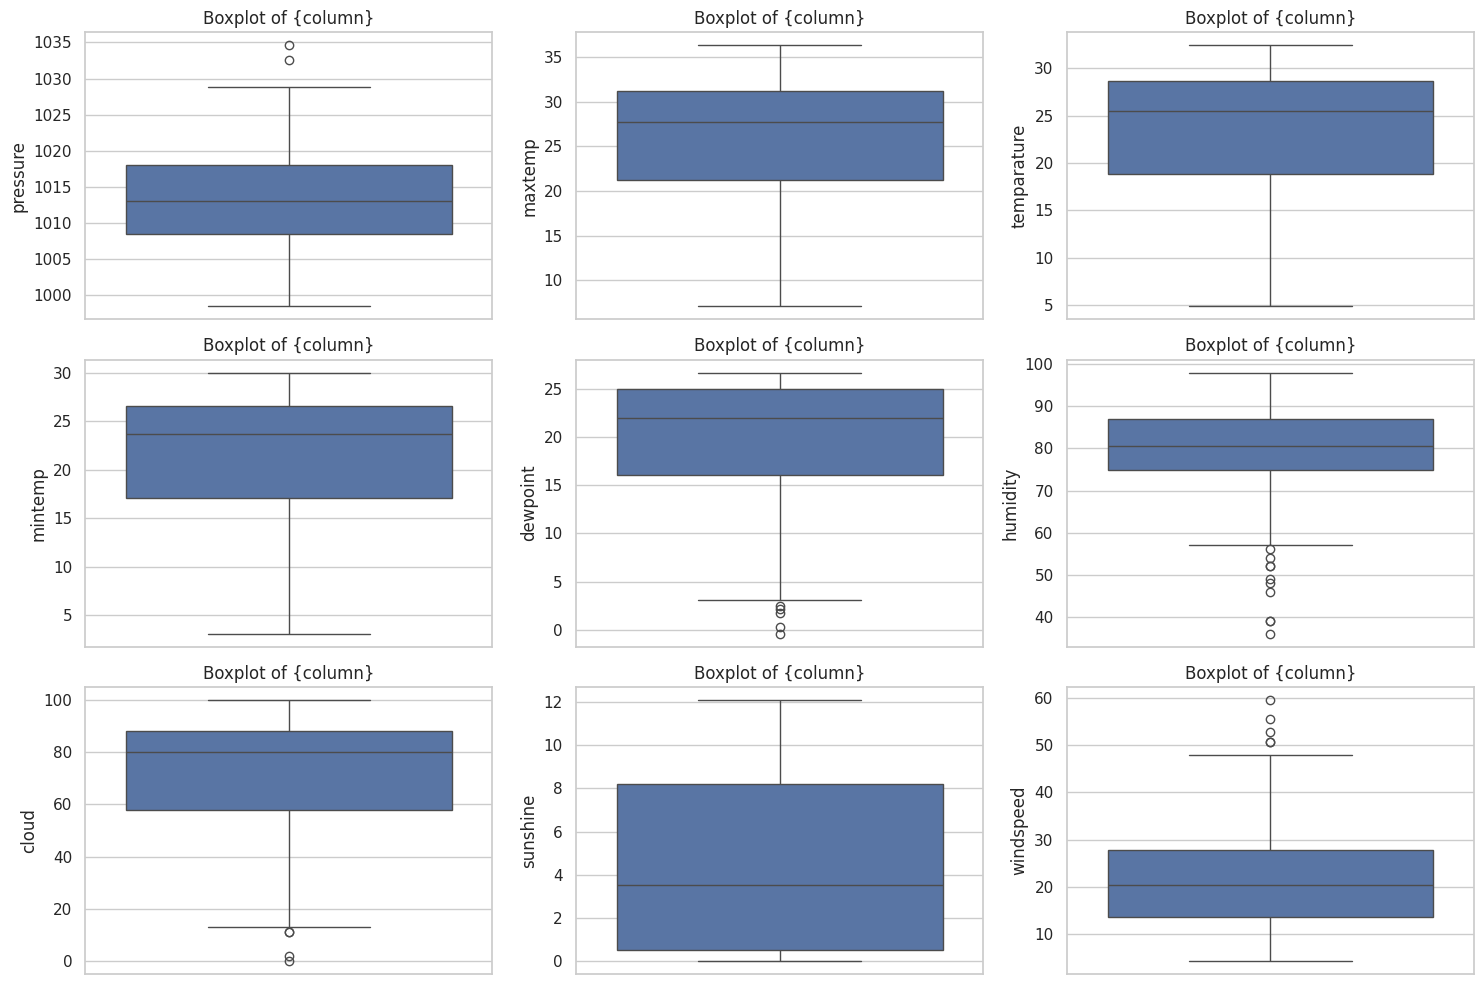

In [39]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity','cloud', 'sunshine', 'windspeed'],1):
  plt.subplot(3, 3, i)
  sns.boxplot(data[column])
  plt.title("Boxplot of {column}")

plt.tight_layout()
plt.show()

**Data preprocessing**

In [40]:
# drop highly correlated column
data = data.drop(columns=['maxtemp', 'temparature', 'mintemp'])

In [41]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [43]:
print(data["rainfall"].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [44]:
# seperate majority and minority class
df_majority = data[data["rainfall"]==1]
df_minority = data[data["rainfall"]==0]


In [45]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [46]:
# Down sample majority class to match minority count
df_majority_downsampled = resample(df_majority,
                                  replace=False,
                                  n_samples=len(df_minority),
                                  random_state=42)

In [47]:
df_majority_downsampled.shape

(117, 8)

In [48]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority])

In [49]:
df_downsampled.shape

(234, 8)

In [50]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [51]:
# shuffle the final dataframe
df_downsampled = df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [52]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [54]:
df_downsampled.value_counts()

pressure  dewpoint  humidity  cloud  rainfall  sunshine  winddirection  windspeed
998.5     24.0      62        55     0         10.8      290.0          17.2         1
          24.8      71        80     1         10.0      220.0          26.4         1
1000.3    25.0      81        88     1         2.5       240.0          18.8         1
1001.0    25.9      75        46     0         10.4      280.0          23.5         1
1002.2    25.5      77        70     0         7.7       350.0          13.6         1
                                                                                    ..
1027.1    3.4       70        95     1         0.0       20.0           55.5         1
1027.4    11.6      79        88     1         0.2       30.0           15.2         1
1028.9    10.5      76        87     0         0.1       20.0           20.4         1
1032.6    3.7       46        25     0         10.1      20.0           28.7         1
1034.6    2.2       61        96     1         0.0       20.0           59.5         1
Name: count, Length: 234, dtype: int64

In [55]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,117
0,117


In [56]:
# split features and target as X and y
X = df_downsampled.drop(columns=["rainfall"])
y = df_downsampled["rainfall"]

In [57]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [58]:
# splitting the data into training data and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Model Training**

In [59]:
rf_model= RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators":[100,200,300],
    "max_features":["sqrt","log2"],
    "max_depth":[None,5,10,20,30],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}


In [60]:
# Hyperparametertuning using GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model,param_grid=param_grid_rf,cv=5,n_jobs=-1,verbose=2)
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [61]:
best_rf_model = grid_search_rf.best_estimator_
print("best paramerters for Random Forest:", grid_search_rf.best_params_)

best paramerters for Random Forest: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


**Model Evaluation**

In [62]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean (cv_scores))

Cross-validation scores: [0.68421053 0.78947368 0.86486486 0.81081081 0.91891892]
Mean cross-validation score: 0.8136557610241821


In [63]:
# test set performance
y_pred = best_rf_model.predict(X_test)
print("Test set Accuracy:", accuracy_score(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))


Test set Accuracy: 0.723404255319149
Confusion Matrix:
 [[16  8]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.69      0.78      0.73        23

    accuracy                           0.72        47
   macro avg       0.73      0.72      0.72        47
weighted avg       0.73      0.72      0.72        47



**Prediction on unknown data**

In [64]:
X_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [67]:
input_data =(1015.9,19.9,95,81,0.0,40.0,13.7)
input_df =pd .DataFrame([input_data],columns=['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'])


In [68]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [69]:
prediction  = best_rf_model.predict(input_df)

In [70]:
print(prediction)

[1]


In [71]:
prediction = best_rf_model.predict(input_df)
print("prediction result :","Rainfall" if prediction[0]==1 else "No Rainfall")

prediction result : Rainfall


In [75]:
# save model and feature names to a pickle file
model_data ={"model": best_rf_model,"features_names":X.columns.tolist()}
with open("rainfall_prediction_model.pkl","wb") as file:
  pickle.dump(model_data,file)

**Load the saved model and file and use it for prediction **

In [76]:
import pickle
import pandas as pd


In [78]:
#load the trained model and features names from the pickle file
with open("rainfall_prediction_model.pkl","rb") as file:
  model_data = pickle.load(file)

In [79]:
model= model_data["model"]
features_names = model_data["features_names"]

In [80]:
input_data =(1015.9,19.9,95,81,0.0,40.0,13.7)
input_df =pd .DataFrame([input_data],columns=features_names)

In [81]:
prediction = best_rf_model.predict(input_df)
print("prediction result :","Rainfall" if prediction[0]==1 else "No Rainfall")

prediction result : Rainfall
